In [1]:
import glob
from PIL import Image
import numpy as np

### Testing with DeepLab : https://github.com/DrSleep/tensorflow-deeplab-resnet


### Steps to follow:

In order to apply the same scripts using your own dataset, you would need to follow the next steps:

0. Make sure that your segmentation masks are in the same format as the ones in the DeepLab setup (i.e., without a colour map). This means that if your segmentation masks are RGB images, you would need to convert each 3-D RGB vector into a 1-D label. For example, take a look [here](https://gist.github.com/DrSleep/4bce37254c5900545e6b65f6a0858b9c);
1. Create a file with instances of your dataset in the same format as in files [here](https://github.com/DrSleep/tensorflow-deeplab-resnet/tree/master/dataset);
2. Change the flags `data-dir` and `data-list` accordingly in thehttps://gist.github.com/DrSleep/4bce37254c5900545e6b65f6a0858b9c); script file that you will be using (e.g., `python train.py --data-dir /my/data/dir --data-list /my/data/list`);
3. Change the `IMG_MEAN` vector accordingly in the script file that you will be using;
4. For visualisation purposes, you will also need to change the colour map [here](https://github.com/DrSleep/tensorflow-deeplab-resnet/blob/master/deeplab_resnet/utils.py);
5. Change the flags `num-classes` and `ignore-label` accordingly in the script that you will be using (e.g., `python train.py --ignore-label 255 --num-classes 21`).
6. If restoring weights from the `PASCAL` models for your dataset with a different number of classes, you will also need to pass the `--not-restore-last` flag, which will prevent the last layers of size <code>21</code> from being restored.


### 0-  Make sure that your segmentation masks are in the same format as the ones in the DeepLab setup (i.e., without a colour map).

In [2]:
def convert_from_color_segmentation(arr_3d):
    rr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)
    class_grass = np.all(arr_3d == np.array((0,0,0)).reshape(1, 1, 3), axis=2)
    class_burnt = np.all(arr_3d == np.array((240,0,0)).reshape(1, 1, 3), axis=2)
    rr_2d[class_grass] = 255
    rr_2d[class_burnt] = 0
    return rr_2d

In [3]:
labels = glob.glob("dataset/segmented/*.png")

In [ ]:
Image.open(label).size

In [ ]:
for label in labels:
    print(label)
    label_arr = np.array(Image.open(label))
    label_tf = Image.fromarray(convert_from_color_segmentation(label_arr))
    label_tf.save(label.replace("segmented","segmented_tf"))

### 1- Create a file with instances of your dataset in the same format as in files

In [ ]:
labels_tf = glob.glob("/Users/Marcelpv96/Dropbox/UNI/LiquidLGalaxy/GSOC-2019-Dronecoria/dataset/segmented_tf/*.png")
images = glob.glob("/Users/Marcelpv96/Dropbox/UNI/LiquidLGalaxy/GSOC-2019-Dronecoria/dataset/burnt/*.png")
labels_tf.sort()
images.sort()

In [ ]:
train_size = round(len(images)*0.7)
validation_size = round(len(images)*0.1)
test_size = round(len(images)*0.2)

In [ ]:
def generate_dataset(file_name, size):
    data_set = ""
    for i in range(size[0], size[1]):
        image = images[i]
        label = labels_tf[i]
        data_set += """%s %s
""" %((image, label))
    with open(file_name, 'w') as data_set_file:
        data_set_file.write(data_set)    

In [ ]:
def generate_test_dataset(file_name, size):
    data_set = ""
    for i in range(size[0], size[1]-1):
        image = images[i]
        label = labels_tf[i]
        data_set += """%s
""" %((label.split('/')[-1].replace(".png", "")))
    with open(file_name, 'w') as data_set_file:
        data_set_file.write(data_set)    

In [ ]:
generate_test_dataset('train.txt', (0, train_size))

In [ ]:
generate_test_dataset('trainval.txt', (train_size, train_size+validation_size))

In [ ]:
labels_tf

In [ ]:
generate_test_dataset('val.txt', (train_size+validation_size, train_size+validation_size+test_size))

# Checking output of my DeepLab NeuralNetwork

In [4]:
glob.glob('research/deeplab/burnt_forest/vis/segmentation_results/*')

['research/deeplab/burnt_forest/vis/segmentation_results/000011_image.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000005_image.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000024_image.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000030_image.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000002_prediction.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000017_prediction.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000018_prediction.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000008_image.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000029_image.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000010_prediction.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000005_prediction.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000022_image.png',
 'research/deeplab/burnt_forest/vis/segmentation_results/000036

In [5]:
arr_pred = np.array(Image.open("research/deeplab/burnt_forest/vis/segmentation_results/000011_prediction.png"))

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

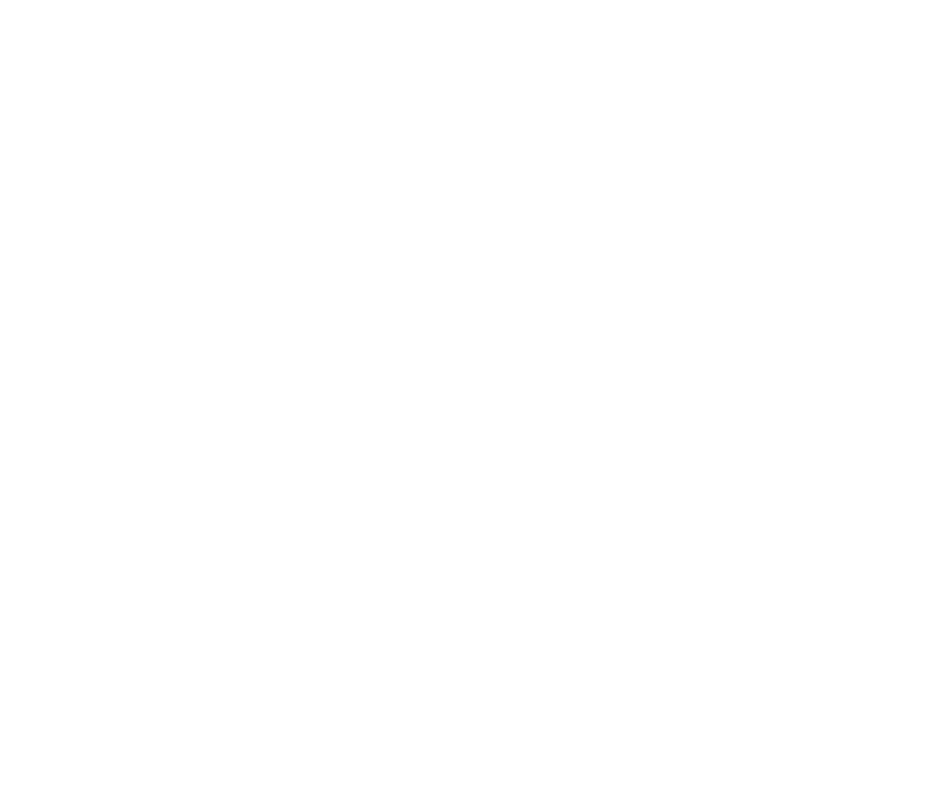